In [1]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import time
from datetime import datetime

In [2]:
#create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
#create a list for holding the cities.
cities = []
#identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    #if the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

596

In [5]:
#create empty list to hold the weather data
city_data = []
#print the beginning of the logging.
print("Beginning Data Retrieval       ")
print("-------------------------------")

#create counters
record_count = 1
set_count = 1

Beginning Data Retrieval       
-------------------------------


#loop through all the cities in our list.
for i in range(len(cities)):

    #group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    #create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [ ]:
#import request library
import requests
#import API key
from config import weather_api_key

#starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


#loop through all the cities in the list.
for i, city in enumerate(cities):

    #group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    #create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    #log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    #run an API request for each of the cities.
    try:
        #parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        #parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        #convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        #append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

#if an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

#indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

print(len(city_data))

In [13]:
#convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobyo,5.3505,48.5268,90.73,53,100,14.34,SO,2022-05-02 07:55:19
1,Dalvik,65.9702,-18.5286,30.13,67,91,3.76,IS,2022-05-02 07:55:19
2,Hilo,19.7297,-155.0900,73.27,99,100,3.00,US,2022-05-02 07:55:20
3,Punta Arenas,-53.1500,-70.9167,35.71,93,75,6.91,CL,2022-05-02 07:52:33
4,Tuatapere,-46.1333,167.6833,52.88,85,67,5.08,NZ,2022-05-02 07:55:21
5,Ust-Maya,60.4167,134.5333,46.53,66,68,11.07,RU,2022-05-02 07:55:21
6,Butaritari,3.0707,172.7902,81.52,79,18,13.18,KI,2022-05-02 07:55:22
7,Porto-Vecchio,41.5910,9.2795,65.73,72,20,5.75,FR,2022-05-02 07:55:23
8,Mataura,-46.1927,168.8643,55.47,78,26,2.04,NZ,2022-05-02 07:53:11
9,Betsiamites,48.9413,-68.6460,34.20,90,5,5.82,CA,2022-05-02 07:55:23


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", 
                    "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hobyo,SO,2022-05-02 07:55:19,5.3505,48.5268,90.73,53,100,14.34
1,Dalvik,IS,2022-05-02 07:55:19,65.9702,-18.5286,30.13,67,91,3.76
2,Hilo,US,2022-05-02 07:55:20,19.7297,-155.0900,73.27,99,100,3.00
3,Punta Arenas,CL,2022-05-02 07:52:33,-53.1500,-70.9167,35.71,93,75,6.91
4,Tuatapere,NZ,2022-05-02 07:55:21,-46.1333,167.6833,52.88,85,67,5.08
...,...,...,...,...,...,...,...,...,...
542,Abu Kamal,SY,2022-05-02 08:10:59,34.4506,40.9171,78.28,38,0,15.82
543,Dabakala,CI,2022-05-02 08:10:59,8.3667,-4.4333,80.78,73,82,4.65
544,Chilca,PE,2022-05-02 08:11:00,-12.5211,-76.7372,63.14,91,59,3.31
545,Esmeraldas,BR,2022-05-02 08:11:00,-19.7625,-44.3139,61.66,81,0,2.28


In [15]:
#create the output file (CSV)."C:\Users\Elissa\World_Weather_Analysis\weather_data"
output_data_file = "C:/Users/Elissa/World_Weather_Analysis/weather_data/cities.csv"
#export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
#extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

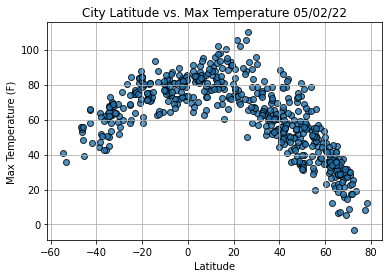

In [17]:
#import time module
import time

#build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure.
plt.savefig("weather_data/Fig1.png")
plt.show()

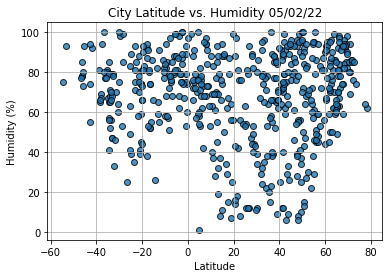

In [18]:
#build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
#save the figure.
plt.savefig("weather_data/Fig2.png")
plt.show()

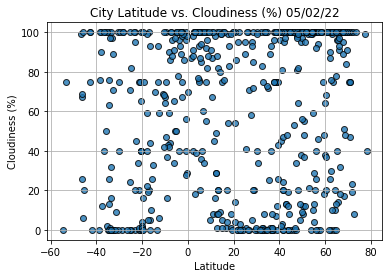

In [19]:
#build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
#save the figure.
plt.savefig("weather_data/Fig3.png")
plt.show()

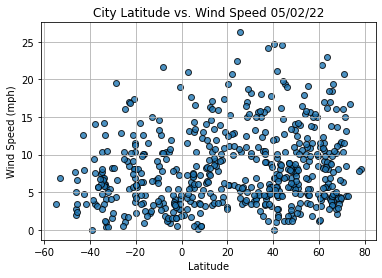

In [20]:
#build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
#save the figure.
plt.savefig("weather_data/Fig4.png")
plt.show()

In [65]:
#import linregress
from scipy.stats import linregress

#create function to create perform linear regression on weather data & plot regression line and equation with data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    #run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    #calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    #equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    #create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    #annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    
    #print linregress
    print(linregress(x_values, y_values))
    

In [66]:
index13 = city_data_df.loc[13]
index13

City                       Bethel
Country                        US
Date          2022-05-02 07:54:27
Lat                       41.3712
Lng                       -73.414
Max Temp                    52.88
Humidity                       88
Cloudiness                    100
Wind Speed                   1.01
Name: 13, dtype: object

In [67]:
#create northern and southern hemisphere df
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

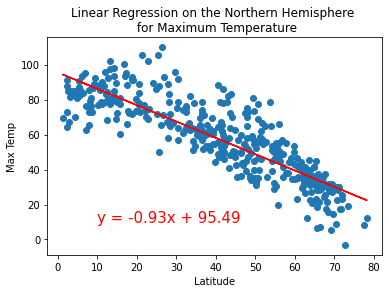

LinregressResult(slope=-0.9344960181839527, intercept=95.49054919068355, rvalue=-0.8551726240569799, pvalue=4.592389696088626e-111, stderr=0.02898074052751897, intercept_stderr=1.3026867257646753)


In [68]:
#preform linregress on Max Temp on hemisphere
#linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
#call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature',
                       'Max Temp',(10,10))


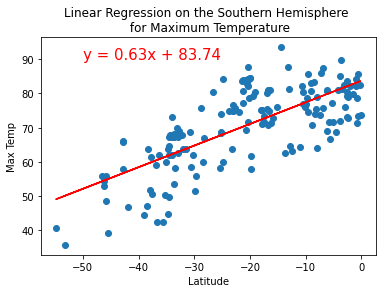

LinregressResult(slope=0.6322025472024252, intercept=83.7367962519823, rvalue=0.7292793254400274, pvalue=2.504742588397316e-28, stderr=0.04674580982356197, intercept_stderr=1.1662572176280424)


In [69]:
#linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
#call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature',
                       'Max Temp',(-50,90))

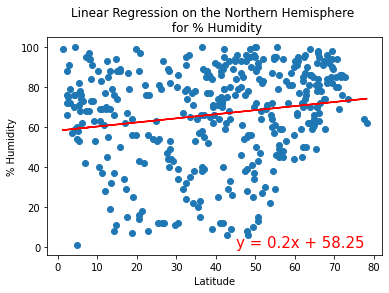

LinregressResult(slope=0.20473907506178649, intercept=58.25370329815888, rvalue=0.17352806549572672, pvalue=0.0006371144091167806, stderr=0.05945113162272313, intercept_stderr=2.6723333699175176)


In [70]:
#linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
#call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity',
                       '% Humidity',(45,0))

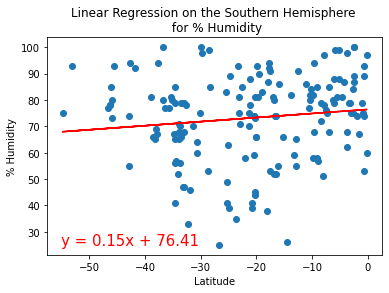

LinregressResult(slope=0.1543431455751779, intercept=76.4132166842235, rvalue=0.12706502117332308, pvalue=0.10602269853032528, stderr=0.09495412361251851, intercept_stderr=2.3690023218043956)


In [71]:
#linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity',
                       '% Humidity',(-55,25))

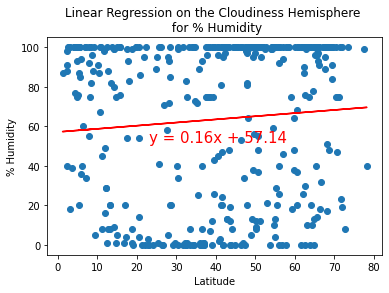

LinregressResult(slope=0.1591501455551925, intercept=57.13703207005095, rvalue=0.08136396158000683, pvalue=0.11141979834654019, stderr=0.09974725616897305, intercept_stderr=4.483647559639977)


In [78]:
#linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
#call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Cloudiness Hemisphere \n for % Humidity',
                       '% Humidity',(23,52))

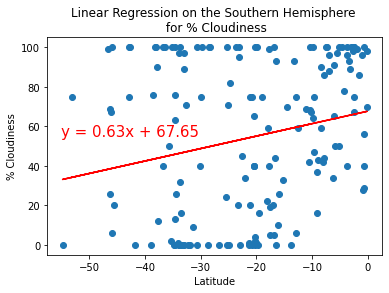

LinregressResult(slope=0.630125121327161, intercept=67.6502436332604, rvalue=0.22243990816199616, pvalue=0.004318458732375727, stderr=0.21766163641062944, intercept_stderr=5.430421580517274)


In [82]:
#linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
#call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness',
                       '% Cloudiness',(-55,55))

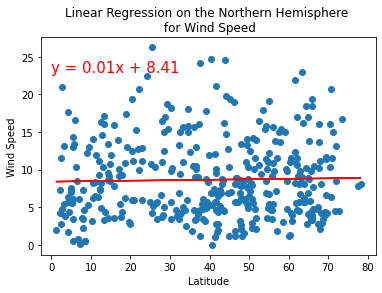

LinregressResult(slope=0.00628524848110231, intercept=8.408060314694803, rvalue=0.024993001759425, pvalue=0.6253795575623227, stderr=0.012862834064594453, intercept_stderr=0.5781854737545374)


In [86]:
#linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
#call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed',\
                       'Wind Speed',(0,23))

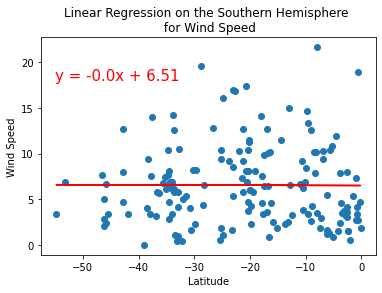

LinregressResult(slope=-0.0016204667362637488, intercept=6.50664567683241, rvalue=-0.005065335696070356, pvalue=0.9488327995529263, stderr=0.025212352952966383, intercept_stderr=0.6290208409216983)


In [89]:
#linear regression on the Sorthern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
#call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed',\
                       'Wind Speed',(-55,18))